In [51]:
import networkx as nx

# Input
name = 'ca-netscience'
input_file = 'C:\\Users\\jgd\\Documents\\GBP\\dataset_github\\' + name + '.mtx'
n = 379
m = 914

# Optimal solution (vertices are enumerated from 1 to n)
s= [5, 67, 358, 269, 377, 251]

# Load graph
G = nx.Graph()
for j in range(0,n):
    G.add_node(j)

f = open(input_file, "r")
string = f.readline()
for i in range(0, m):        
    string = f.readline()
    string = string.split()
    j = int(string[0])-1
    k = int(string[1])-1
    G.add_edge(j, k)
f.close()


if nx.is_connected(G):
    sp = dict(nx.all_pairs_shortest_path_length(G))
    d = []
    for i in range(0,n):
        list = []
        for j in range(0,n):
            list.append(sp[i][j])
        d.append(list)
    del sp
else:
    d = []
    for i in range(0,n):
        list = []
        for j in range(0,n):
            list.append(float("inf"))
        d.append(list)
    connected_components = nx.connected_components(G)
    for component in connected_components:
        # create subgraph    
        G_sub = nx.Graph()
        for v in component:
            G_sub.add_node(v)
            for e in G.edges:
                if e[0]==v or e[1]==v:
                    G_sub.add_edge(e[0],e[1])

        sp = dict(nx.all_pairs_shortest_path_length(G_sub))
        for item1 in sp.items():
            for item2 in item1[1].items():
                d[item1[0]][item2[0]] = item2[1]
                d[item2[0]][item1[0]] = item2[1]
        del G_sub
        del sp

conn_comp = nx.number_connected_components(G)
n_nodes   = len(nx.nodes(G))
n_edges   = len(nx.edges(G))
av_degree = 0
for e in nx.degree(G):
    av_degree = av_degree + e[1]
av_degree = av_degree / n_nodes
density   = nx.density(G)
print("conn. comp.: " + str(conn_comp))
print("num vertices: " + str(n_nodes))
print("num edges: " + str(n_edges))
print("density: " + str(density))
print("av degree: " + str(av_degree))

conn. comp.: 1
num vertices: 379
num edges: 914
density: 0.012759838617358406
av degree: 4.823218997361478


In [52]:
# Verify that s is a burning sequence
vertices = []
for i in range(n):
    covered = False
    for j in range(len(s)):
        if d[i][s[j]] <= k - (s.index(s[j]) + 1):
            covered = True
    if covered:
        vertices.append(i)
if len(vertices) == n:
    print("s is a burning sequence")
else:
    print("s is not a burning sequence")

s is a burning sequence


In [53]:
# Assign each vertex to the element of the sequence that burns it for the first time

import matplotlib.pyplot as plt
from matplotlib import cm

k = len(s)
#print(k)
vertices = []
node_color = []

for i in range(n):
    covered = False
    for j in range(len(s)):
        if d[i][s[j]] <= k - (s.index(s[j]) + 1):
            covered = True
    if covered:
        vertices.append(i)
#print(len(vertices))

node_size  = []

for i in range(n):
    if i in s:
        node_size.append(100)
        #G.add_node(i, s="d")
        p = s.index(i)
        #print(p)
        node_color.append((1/float(k-1))*p)
    else:
        node_size.append(10)
        #G.add_node(i, s="o")
        p = 0
        for j in range(len(s)):
            if d[i][s[j]] <= k - (s.index(s[j]) + 1):
                p = j
                break
        node_color.append((1/float(k-1))*p)

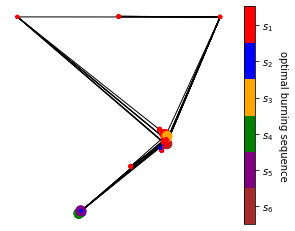

In [57]:
import pydot
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from networkx.drawing.nx_pydot import graphviz_layout

# You may need to adjust this parameter (position of labels' ticks)
extra = 0.1
if len(s) == 4:
    extra = 0.12
if len(s) == 5:
    extra = 0.1
if len(s) == 6:
    extra = 0.08
if len(s) == 7:
    extra = 0.066
if len(s) == 12:
    extra = 0.04
    
# You can play around with the layout
pos = graphviz_layout(G, prog="circo") # dot, twopi, fdp, sfdp, circo
#pos = graphviz_layout(G, prog="fdp") # dot, twopi, fdp, sfdp, circo, neato
#print(pos)
#pos = nx.spring_layout(G, iterations=1000, seed=0)
#pos = nx.circular_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.planar_layout(G)
#pos = nx.random_layout(G)
#pos = nx.kamada_kawai_layout(G)
#pos = nx.fruchterman_reingold_layout(G) # equals spring_layout
#pos = nx.shell_layout(G)
#pos = nx.spectral_layout(G) # great for lattice and squaredIdealBurn7
#pos = nx.spiral_layout(G)

# You can play around with the color map
my_colors = ['red','blue','orange','green','purple','brown','#ff6666','#4ca3dd','#bada55','grey','#f7dd7c','black','pink']
cmap = colors.ListedColormap(my_colors[0:len(s)])
#cmap = plt.get_cmap('magma', len(s))
#cmap = plt.get_cmap('Greys', len(s))
#cmap = plt.get_cmap('viridis', len(s))
#cmap = plt.get_cmap('Reds', len(s))
#cmap = plt.get_cmap('inferno', len(s))
#cmap = plt.get_cmap('hot', len(s)) # best so far
#cmap = plt.get_cmap('gist_heat', len(s))
#cmap = plt.get_cmap('afmhot', len(s))
#cmap = plt.get_cmap('tab20', len(s)) # me gusta
#cmap = plt.get_cmap('Paired', len(s)) # me gusta
#cmap.set_under('gray')
#cmap = cm.coolwarm_r

f = plt.figure(figsize=(5,4))

nx.draw(G, node_color = node_color,cmap=cmap, node_size = node_size, with_labels=False, pos = pos, ax=f.add_subplot(111))
reversed_cmap = cmap.reversed()

sm = plt.cm.ScalarMappable(cmap=reversed_cmap, norm=plt.Normalize(vmin = 0, vmax=1))
sm._A = []
ticks  = []
labels =[]
for i in range(len(s)):
    ticks.append((1/float(k))*i + extra)
    labels.append(r'$s_' + '{' + str(i+1) + '}$')
cbar = plt.colorbar(sm,ticks=ticks)
labels.reverse()
cbar.ax.set_yticklabels(labels)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('optimal burning sequence', rotation=270)

f.savefig("graph.png")
f.savefig("plot.pdf")